# Latar Belakang
AWS (Amazon Web Service) is a Cloud Computing service from Amazon company. AWS is one of top choices for cloud computing with a series of advantages and features. Cloud Computing allows user for large-scale data storage (Aws-Amazon, 2023). This technology is essentially an answer to the needs of modern business players in many industry. In this current state, there have been a series of Cloud Computing names with various classes and types of services, including AWS (Meilinaeka, 2023).

The first one is IaaS model providing access to basic resources such as physical machines, virtual machines, and virtual storage. Examples of Infrastructure-as-a-Service (IaaS) includes Amazon Web Services (AWS), Google Cloud Platform (GCP), and Microsoft Azure (Meilinaeka, 2023). While, the second one is, PaaS model providing access to a development & deployment service for an application. Examples of Platform-as-a-Service (PaaS) include Application Developers Services: Execution, Messaging, App Development, Integration, Database-MySQL, Oracle, Web Server- Tomcat development tools, RedHat. The last one is, SaaS model allows the use of software applications as a service to end users. Examples of Software-as-a-Service (SaaS) include Adobe, Google, Salesforce, Cisco, SAP, Microsoft, and Oracle (Saraswat, 2020).

## Pernyataan Masalah
Perusahaan ingin mengetahui **Region, produk, atau pelanggan mana yang mengalami profit negatif meskipun jumlah volume penjualan tinggi**. Informasi ini akan membantu perusahaan untuk mengidentifikasi penyebab dari penurunan profit dimana volume penjualan tinggi, meningkatkan profit margin, dan membuat strategi penjualan baru.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Apa faktor yang menyebabkan profit negatif dari produk AWS SaaS meskipun volume yang diperjualkan tinggi?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data penjualan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales/data). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait sales dan marketing software SaaS dengan company lain (B2B). Ada 19 kolom di dalam dataset SaaS-Sales, yaitu:  

* Row ID: A unique identifier for each transaction.
* Order ID: A unique identifier for each order.
* Order Date: The date when the order was placed.
* Date Key: A numerical representation of the order date (YYYYMMDD).
* Contact Name: The name of the person who placed the order.
* Country: The country where the order was placed.
* City: The city where the order was placed.
* Region: The region where the order was placed.
* Subregion: The subregion where the order was placed.
* Customer: The name of the company that placed the order.
* Customer ID: A unique identifier for each customer.
* Industry: The industry the customer belongs to.
* Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
* Product: The product was ordered.
* License: The license key for the product.
* Sales: The total sales amount for the transaction.
* Quantity: The total number of items in the transaction.
* Discount: The discount applied to the transaction.
* Profit: The profit from the transaction

Berikut 5 baris teratas dan terbawah dari dataset SaaS-Sales.

In [3]:
df = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'], dtype={'Customer ID': str})
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,516,EMEA-2023-127432,2023-01-23,20230123,Samantha Rampling,Netherlands,The Hague,EMEA,EU-WEST,FedEx,1036,Transportation,Enterprise,Alchemy,WUQIOIL1BR,2999.950,5,0.0,1379.977
1,2898,EMEA-2022-164630,2022-01-04,20220104,Justin Walker,Sweden,Stockholm,EMEA,NOR,Aviva,1006,Finance,Strategic,Alchemy,25M57LOO9M,959.968,4,0.2,119.996
2,216,AMER-2021-146262,2021-01-02,20210102,Evan Terry,Mexico,Mexico City,AMER,LATAM,Tyson Foods,1088,Consumer Products,Strategic,Big Ol Database,A8KUCPEZPR,1188.000,9,0.7,-950.400
3,978,AMER-2023-159366,2023-01-08,20230108,Ian Butler,Brazil,São Paulo,AMER,LATAM,China National Petroleum,1023,Energy,Strategic,Big Ol Database,L1PWPWZBDL,3059.982,2,0.1,679.996
4,1341,EMEA-2023-113481,2023-01-03,20230103,Wendy Young,Sweden,Stockholm,EMEA,NOR,Caterpillar,1016,Manufacturing,Strategic,Big Ol Database,UIT02D0GXC,695.700,2,0.5,-27.828


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9940,EMEA-2022-169824,2022-12-13,20221213,Chloe May,United Kingdom,London,EMEA,UKIR,Chevron,1017,Energy,Strategic,Support,C19FFHAPTK,35.52,4,0.0,9.9456
9990,9944,AMER-2020-143371,2020-12-28,20201228,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,1089,Consumer Products,SMB,Support,CPVKK7VGRS,51.15,5,0.0,13.2990
9991,9954,AMER-2021-141593,2021-12-14,20211214,Lisa Lawrence,United States,New York City,AMER,NAMER,J.P. Morgan Chase & Co.,1054,Finance,Strategic,Support,YL3NR5VQ9M,6.48,1,0.0,3.1104
9992,9966,APJ-2022-146374,2022-12-06,20221206,Emma Watson,Philippines,Manila,APJ,APAC,United Parcel Service,1090,Transportation,Strategic,Support,0QG1DP5TZL,4.98,1,0.0,2.3406
9993,9976,AMER-2022-103674,2022-12-07,20221207,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,Support,79CKFKL7LQ,13.36,2,0.0,6.4128


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset SaaS-Sales.

In [ ]:
print("==== Data Info ====")
df.info()

==== Data Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Date Key       9994 non-null   int64         
 4   Contact Name   9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Subregion      9994 non-null   object        
 9   Customer       9994 non-null   object        
 10  Customer ID    9994 non-null   object        
 11  Industry       9994 non-null   object        
 12  Segment        9994 non-null   object        
 13  Product        9994 non-null   object        
 14  License        9994 non-null   object        
 15  S

In [14]:
print("\n==== Missing Values ====")
print(df.isnull().sum())


==== Missing Values ====
Row ID           0
Order ID         0
Order Date       0
Date Key         0
Contact Name     0
Country          0
City             0
Region           0
Subregion        0
Customer         0
Customer ID      0
Industry         0
Segment          0
Product          0
License          0
Sales            0
Quantity         0
Discount         0
Profit           0
Profit Margin    0
dtype: int64


<Axes: >

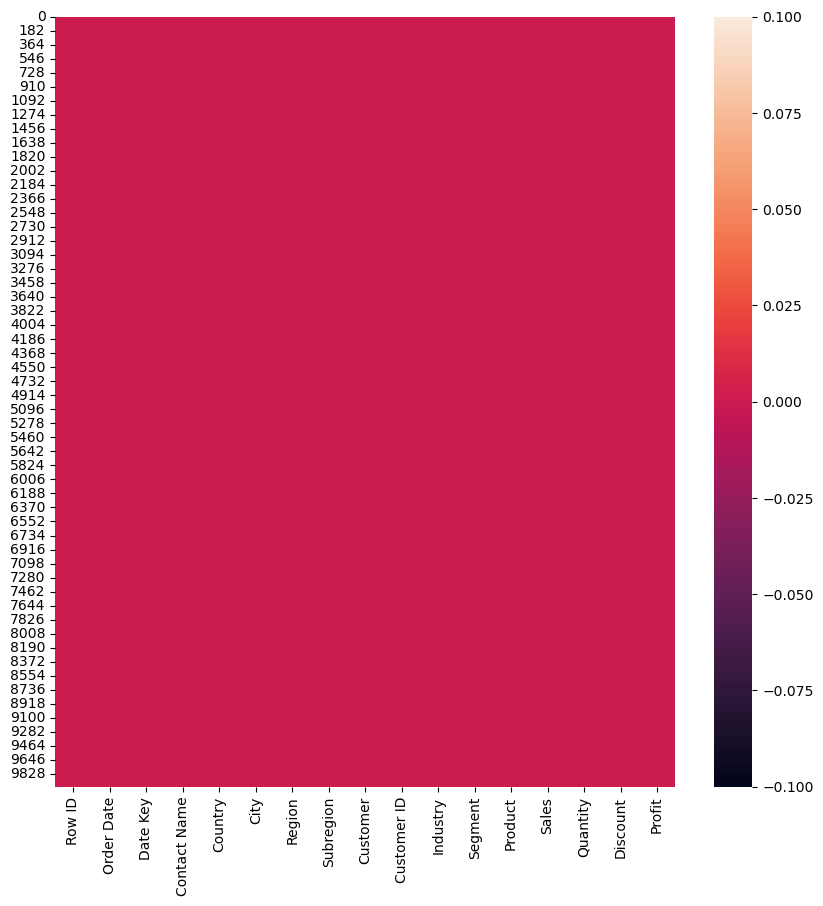

In [5]:
#Sebaran Missing Value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Row ID','Order Date','Date Key','Contact Name','Country','City','Region','Subregion','Customer','Customer ID','Industry','Segment','Product','Sales','Quantity','Discount','Profit']].isna())

In [15]:
print("\n==== Duplicate Rows ====")
print(f"Duplicates: {df.duplicated().sum()}")


==== Duplicate Rows ====
Duplicates: 0


In [16]:
print("\n==== Summary and Outlier Checking ====")
display(df.describe())


==== Summary and Outlier Checking ====


,Row ID,Order Date,Date Key,Sales,Quantity,Discount,Profit,Profit Margin
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,229.858001,3.789574,0.156203,28.656896,12.031393
min,1.000000,2020-01-04 00:00:00,2.020010e+07,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,17.280000,2.000000,0.000000,1.728750,7.500000
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,54.490000,3.000000,0.200000,8.666500,27.000000
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,209.940000,5.000000,0.200000,29.364000,36.250000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,22638.480000,14.000000,0.800000,8399.976000,50.000000
std,2885.163629,NaN,1.123898e+04,623.245101,2.225110,0.206452,234.260108,46.675435


In [ ]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data = listItem)

tableDesc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Dalam data Sales SaaS, terdapat 9994 row dan setelah dilakukan cleaning, ditemukan bahwa dataset SaaS-Sales tidak memiliki null value dan duplicate rows.

In [4]:
# Outlier Handling
negative_sales = df[df['Sales'] < 0]
if not negative_sales.empty:
    print(f"Warning: Removed {len(negative_sales)} rows with Negative Sales")
    df = df[df['Sales'] >= 0]

    
df['Profit Margin'] = (df['Profit'] / df['Sales'] * 100)

# Display cleaned dataset
print(f"Cleaned Dataset Shape: {df.shape}")
display(df.head())
display(df.tail())

Cleaned Dataset Shape: (9994, 20)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,516,EMEA-2023-127432,2023-01-23,20230123,Samantha Rampling,Netherlands,The Hague,EMEA,EU-WEST,FedEx,1036,Transportation,Enterprise,Alchemy,WUQIOIL1BR,2999.950,5,0.0,1379.977,46.000000
1,2898,EMEA-2022-164630,2022-01-04,20220104,Justin Walker,Sweden,Stockholm,EMEA,NOR,Aviva,1006,Finance,Strategic,Alchemy,25M57LOO9M,959.968,4,0.2,119.996,12.500000
2,216,AMER-2021-146262,2021-01-02,20210102,Evan Terry,Mexico,Mexico City,AMER,LATAM,Tyson Foods,1088,Consumer Products,Strategic,Big Ol Database,A8KUCPEZPR,1188.000,9,0.7,-950.400,-80.000000
3,978,AMER-2023-159366,2023-01-08,20230108,Ian Butler,Brazil,São Paulo,AMER,LATAM,China National Petroleum,1023,Energy,Strategic,Big Ol Database,L1PWPWZBDL,3059.982,2,0.1,679.996,22.222222
4,1341,EMEA-2023-113481,2023-01-03,20230103,Wendy Young,Sweden,Stockholm,EMEA,NOR,Caterpillar,1016,Manufacturing,Strategic,Big Ol Database,UIT02D0GXC,695.700,2,0.5,-27.828,-4.000000


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
9989,9940,EMEA-2022-169824,2022-12-13,20221213,Chloe May,United Kingdom,London,EMEA,UKIR,Chevron,1017,Energy,Strategic,Support,C19FFHAPTK,35.52,4,0.0,9.9456,28.0
9990,9944,AMER-2020-143371,2020-12-28,20201228,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,1089,Consumer Products,SMB,Support,CPVKK7VGRS,51.15,5,0.0,13.2990,26.0
9991,9954,AMER-2021-141593,2021-12-14,20211214,Lisa Lawrence,United States,New York City,AMER,NAMER,J.P. Morgan Chase & Co.,1054,Finance,Strategic,Support,YL3NR5VQ9M,6.48,1,0.0,3.1104,48.0
9992,9966,APJ-2022-146374,2022-12-06,20221206,Emma Watson,Philippines,Manila,APJ,APAC,United Parcel Service,1090,Transportation,Strategic,Support,0QG1DP5TZL,4.98,1,0.0,2.3406,47.0
9993,9976,AMER-2022-103674,2022-12-07,20221207,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,Support,79CKFKL7LQ,13.36,2,0.0,6.4128,48.0


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Region, produk, atau pelanggan mana yang mengalami profit negatif meskipun volume penjualan tinggi**.  

Analisis akan dilakukan dengan membandingkan data

In [5]:
# Mencari persentase transaksi yang tidak memberi profit
loss_df = df[df['Profit'] < 0]
profit_df = df[df['Profit'] >= 0]

loss_count = len(loss_df)
total_count = len(df)
loss_persen = (loss_count / total_count) * 100

print(f"Total Transaksi: {total_count}")
print(f"Transaksi yang tidak menguntungakan: {loss_count} ({loss_persen:.2f}%)")
print(f"Total kerugian: {loss_df['Profit'].sum():.2f}")

Total Transaksi: 9994
Transaksi yang tidak menguntungakan: 1871 (18.72%)
Total kerugian: -156131.29


,Region,Subregion,Sales,Profit,Order ID,Profit Ratio
5,APJ,JAPN,170188.0458,-25729.3563,985,-0.151182
2,APJ,ANZ,84949.6230,-11450.7709,529,-0.134795
7,EMEA,EU-EAST,76118.1140,3864.4893,343,0.050770
9,EMEA,MEA,76793.6960,7200.1468,396,0.093760
6,EMEA,EU,32114.6100,8401.8004,110,0.261619
10,EMEA,NOR,127326.9600,16044.7604,489,0.126012
0,AMER,LATAM,241520.7030,17642.9510,1158,0.073049
4,APJ,IND,53555.3600,18382.9363,149,0.343251
8,EMEA,EU-WEST,384065.6140,26706.6029,1614,0.069537
3,APJ,APAC,106771.2120,30311.1778,447,0.283889


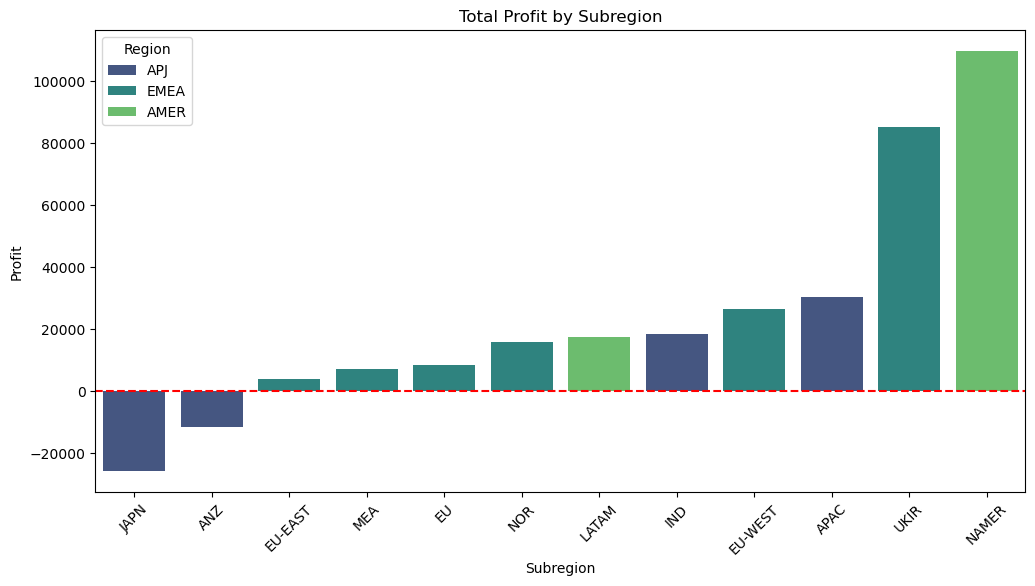

In [ ]:
# Analisa Region dan Subregion
region_analysis = df.groupby(['Region', 'Subregion']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).reset_index()

#Rasio profit untuk region
region_analysis['Profit Ratio'] = region_analysis['Profit'] / region_analysis['Sales']

#Sort dari profit terendah
region_analysis = region_analysis.sort_values(by='Profit', ascending = True)

display(region_analysis)

#Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=region_analysis, x='Subregion', y='Profit', hue='Region', palette='viridis')
plt.title('Total Profit by Subregion')
plt.axhline(0, color='red', linestyle='--') # Garis 0 profit
plt.xticks(rotation=45)
plt.show()

#### Kesimpulan analisis Region dan Subregion

Setelah dilakukan analisis profit di region dan subregion, ditemukan bahwa profit di subregion JAPN dan ANZ (Subregion dari Region APJ) mengalami kerugian. Selanjutnya kita akan menganalisis berdasarkan produk.

### Analisis Produk

Dalam analisis ini, kita akan mencari produk-produk yang mengalami profit negatif.

Produk yang mengalami profit loss:
           Product        Sales    Profit  Discount
6  Marketing Suite  114879.9963 -3472.556   0.21114


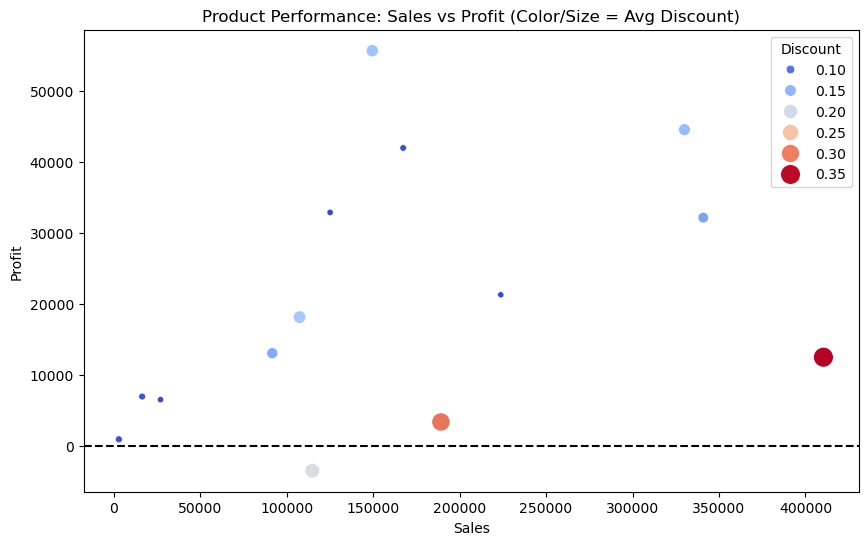

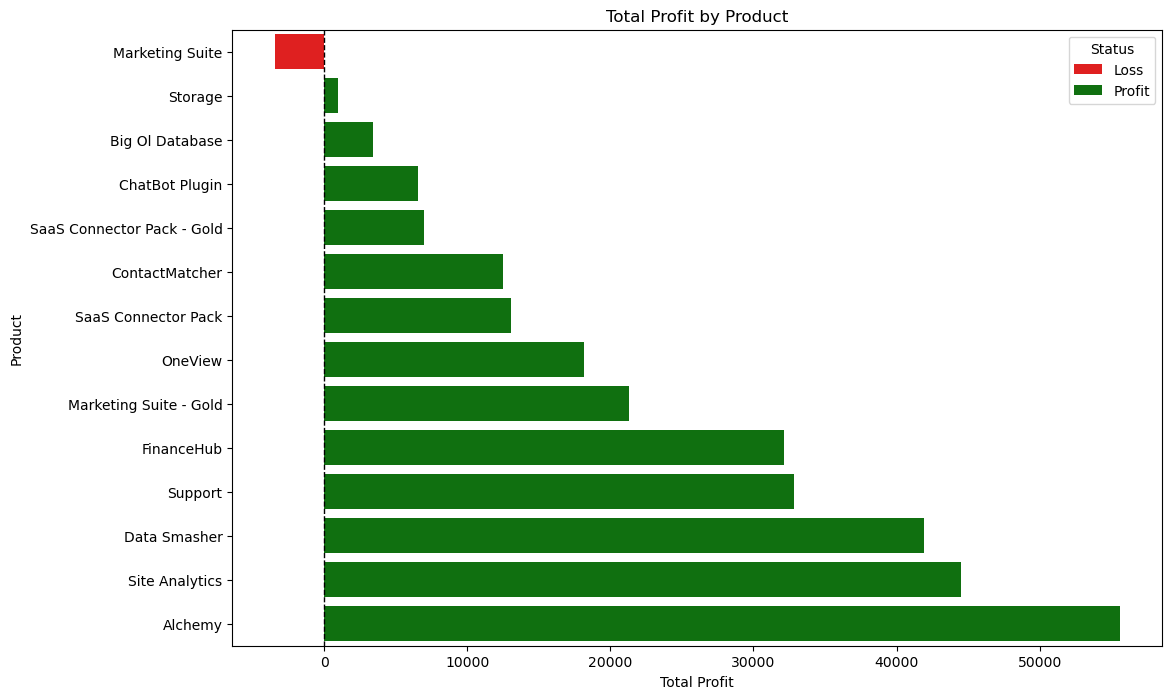

In [26]:
#Analisa Produk

# Analisa Region dan Subregion
product_analysis = df.groupby(['Product']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

#Filter untuk produk dengan total profit negatif
product_negative = product_analysis[product_analysis['Profit'] < 0].sort_values('Profit')

print("Produk yang mengalami profit loss:")
print(product_negative)

# Visualisasi Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_analysis, x='Sales', y='Profit', size='Discount', hue='Discount', sizes=(20, 200), palette='coolwarm')
plt.title('Product Performance: Sales vs Profit (Color/Size = Avg Discount)')
plt.axhline(0, color='black', linestyle='--')
plt.show()

# Visualisasi total profit by product
product_analysis = product_analysis.sort_values('Profit', ascending=True)
product_analysis['Profit Status'] = product_analysis['Profit'].apply(lambda x: 'Profit' if x >= 0 else 'Loss')

plt.figure(figsize=(12, 8))
sns.barplot(data=product_analysis, x='Profit', y='Product', hue='Profit Status', dodge=False, palette={'Profit': 'green', 'Loss': 'red'})
plt.title('Total Profit by Product')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title='Status')
plt.show()

Dari Scatterplot diatas dapat ditemui bahwa product dengan diskon 0.20 mengalami kerugian dalam penjualan, sementara product lainnya dengan rasio diskon berbeda masih mendapatkan profit. Kemudian, dari semua produk yang dijual, produk Marketing Suite mengalami profit loss. 

### Hypothesis Testing (Discount Rate)
Selanjutkan kita akan konfirmasi hasil analisa sebelumnya dengan hipotesis testing terkait rasio diskon dengan profit margin.

In [13]:
# ==== Hypothesis testing ====


# Pembuatan threshold menjadi 2 kelompok
# kelompok A: High Discount
# kelompok B: Low Discount

# H0: Mean dari profit margin dari transaksi High Discount sama dengan transaksi Low Discount
# H1: Mean dari profit margin dari transaksi High Discount lebih rendah transaksi Low Discount
high_discount = df[df['Discount'] > 0.2]['Profit Margin']
low_discount = df[df['Discount'] <= 0.2]['Profit Margin']

t_stat, p_val = stats.ttest_ind(high_discount, low_discount, equal_var=False, alternative='less')

print("==== Hasil Hypothesis Testing ====")
print(f"Mean proft margin untuk diskon tinggi: {high_discount.mean()}")
print(f"Mean proft margin untuk diskon rendah: {low_discount.mean()}")
print(f"T-statisik: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("\nTolak H0.")
    print("Ada cukup bukti yang menyatakan bahwa penjualan dengan diskon tinggi(>20%) dapat mengakibatkan profit margin rendah")
else:
    print("\nGagal menolak H0")
    print("Tidak cukup bukti untuk menyatakan penjualan dengan diskon tinggi dapat engakibatkan profit margin rendah")

==== Hasil Hypothesis Testing ====
Mean proft margin untuk diskon tinggi: -78.44892328790813
Mean proft margin untuk diskon rendah: 26.68539605897779
T-statisik: -59.6085
P-Value: 0.0000e+00

Tolak H0.
Ada cukup bukti yang menyatakan bahwa penjualan dengan diskon tinggi(>20%) dapat mengakibatkan profit margin rendah


Berdasarkan hypothesis testing yang dilakukan, terdapat finding bahwa diskon tinggi mengakibatkan profit margin yang rendah dengan kata lain penjualan dengan diskon tinggi mengarah kepada discount trap

### Analisa Berdasarkan Customer
Dalam analisa berikut kita akan melakukan test korelasi dan mencari customer-customer dimana penjualan mengalami kerugian.

In [12]:
df_copy = df.drop_duplicates(inplace=True)
df_copy = df[df['Sales'] >= 0]

# Customer Analysis

# Customer Grouping
cust_analys = df_copy.groupby(['Customer ID', 'Customer', 'Segment']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum',
    'Order ID': 'nunique'
}).reset_index()

# Customer Profit Margin
cust_analys['Profit Margin'] = (cust_analys['Profit'] / cust_analys['Sales'] * 100)

# Customer with negative profit
unprofit_cust = cust_analys[cust_analys['Profit'] < 0].sort_values(by='Sales', ascending=False)

print("\n==== Top 10 customer with negative profits ====")
display(unprofit_cust.head(10))



==== Top 10 customer with negative profits ====


,Customer ID,Customer,Segment,Sales,Profit,Discount,Quantity,Order ID,Profit Margin
172,1068,Morgan Stanley,SMB,25799.3600,-829.5184,0.160714,430,50,-3.215267
73,1029,Anthem,Enterprise,25043.0500,-1980.7393,0.246667,50,5,-7.909337
252,1098,Nissan Motor,SMB,19954.0706,-2314.3828,0.166383,191,22,-11.598550
6,1003,Allstate,SMB,17429.2770,-4197.6964,0.120408,198,30,-24.084168
224,1088,Tyson Foods,Strategic,15902.7222,-318.8085,0.208000,255,29,-2.004742
174,1070,HSBC Holdings,SMB,14471.6875,-814.2364,0.194048,187,20,-5.626409
22,1009,Ford Motor,Strategic,13991.0690,-1137.9534,0.130000,184,27,-8.133427
94,1036,FedEx,Enterprise,13460.6010,-1328.2971,0.238000,198,29,-9.868037
127,1051,Intel,SMB,12774.9800,-595.7971,0.178947,208,30,-4.663781
7,1003,Allstate,Strategic,11908.0970,-258.7357,0.171053,146,24,-2.172771


#### Kesimpulan Customer Analysis

Dari analisa customer diatas, dapat ditemui bahwa customer dengan angka pembelian besar seperti Morgan Stanley, Anthem, Nissan Motor, dan seterusnya tetap mengalami profit negatif.

## Analisa Segment dan Correlation

Dalam analisa ini, kita akan melihat segmen mana yang mengalami kerugian terbesar, hasil yang diharapkan disini adalah insight terkait strategi penjualan ke segmen pasar.


==== Profitability by Segment ====


,Segment,Profit,Sales,Discount,Customer ID,Profit Margin
0,Enterprise,60298.6785,4.296531e+05,0.141192,76,14.034269
1,SMB,134119.2092,1.161401e+06,0.165265,96,11.548050
2,Strategic,91979.1340,7.061464e+05,0.162104,91,13.025506



 ==== Correlation ====
                  Sales    Profit  Discount  Profit Margin
Sales          1.000000  0.566882 -0.073353       0.058693
Profit         0.566882  1.000000 -0.296650       0.626190
Discount      -0.073353 -0.296650  1.000000      -0.568400
Profit Margin  0.058693  0.626190 -0.568400       1.000000


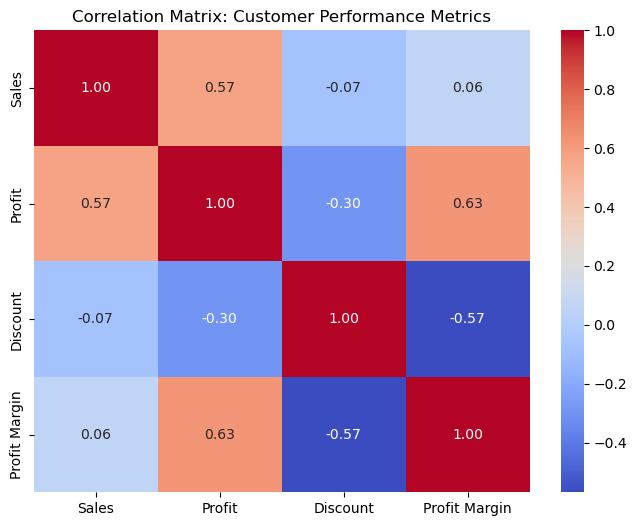


==== Pearson Correlation Test ====
Corr Coefficient: -0.5684
P-value: 6.6135e-24
Tolak H0: Ada bukti statistik bahwa terdapat korelasi antara diskon dan profit margin


In [ ]:
# Segment Analysis

segment_analysis = cust_analys.groupby('Segment').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Discount': 'mean',
    'Customer ID': 'count'
}).reset_index()
segment_analysis['Profit Margin'] = (segment_analysis['Profit']/segment_analysis['Sales'] * 100)
print("\n==== Profitability by Segment ====")
display(segment_analysis)

# Correlation Analysis
corr = cust_analys[['Sales', 'Profit', 'Discount','Profit Margin']].corr()
print("\n ==== Correlation ====")
print(corr)


# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Customer Performance Metrics')
plt.show()

# Hypothesis Testing
# H0: Ada korelasi antara discount dengan profit margin customer
# H1: Tidak ada hubungan antara discount dengan profit margin customer


cust_analys_clean = cust_analys.dropna(subset=['Discount', 'Profit Margin'])

corr_coef, p_value = stats.pearsonr(cust_analys_clean['Discount'], cust_analys_clean['Profit Margin'])

print("\n==== Pearson Correlation Test ====")
print(f"Corr Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada bukti statistik bahwa terdapat korelasi antara diskon dan profit margin")
else:
    print("Gagal tolak H0: Tidak terdapat bukti untuk menyatakan bahwa terdapat korelasi antara diskon dan profit margin")

### Kesimpulan Segment Analysis

Dari hasil analisa segmen, kita dapat menemukan informasi bahwa segmen SMB adalah segmen dengan profit margin paling kecil (11.55%) sedangkan segmen Enterprise memiliki profit margin terbesar (14.03%).

Sementara itu dari correlation test dapat disimpulkan bahwa:
* Ada korelasi positif antara sales dengan profit, karena pada umumnya penjualan yang besar akan berakibat pada yang pendapatan besar. Tetapi hal ini tidak selalu terjadi.
* Ada korelasi negatif antara diskon dengan proft (-0.3), bisa disimpulkan bahwa diskon yang tinggi cenderung menghasilkan total profit yang rendah.
* Ada korelasi negatif yang tinggi antara diskon dengan profit margin (-0.57), semakin tinggi diskon yang diberikan kepada pembeli maka profit margin yang didapatkan angka semakin rendah.

# Kesimpulan dan Rekomendasi

Dari analisis yang dilakukan, kita dapat membuat kesimpulan tentang:
### 1. Rasio Diskon dan Profit 
* Produk dengan diskon diatas 20% cenderung menghasilkan profit negatif.
* Meskipun produk dengan diskon tinggi meningkatkan jumlah volume (Quantity) penjualan, jika rasio tidak diubah maka profit margin akan semakin turun.

### 2. Penjualan Regional
* Dari semua region penjualan, terdapat satu region yang mengalami penurunan profit yaitu Region APJ dengan subregion JAPN dan ANZ
* kedua Subregion (JAPN dan ANZ) menunjukan volume penjualan yang tinggi namun profit yang didapatkan negatif

### 3. Produk
* Produk seperti Marketing Suites memiliki profit negatif karena diskon yang diberikan.

## Rekomendasi
1. Perusahaan dapat melakukan evaluasi ulang terhadap pemberian diskon untuk produk yang akan dijual, untuk pendapatan optimal diskon tidak lebih dari 20%.

2. sales Director di Subregion yang terdapat profit negatif bisa melakukan tinjau ulang terkait strategi penjualan agar dapat menyeimbangi jumlah penjualan dan pendapatan

3. Perusahaan dapat melakukan penempatan diskon produk kepada segmen yang dimana terdapat demand untuk diskon dan mengurangi diskon di segmen yang tidak membutuhkan diskon.